This notebook is run on 2.3 GHz Dual-Core Intel Core i5 processor on a 13 inch 2017 Macbook

In [11]:
import jax
import numpy
import jammer

import emcee
import corner
jax.config.update("jax_enable_x64", True)

key = jax.random.PRNGKey(42)
key, subkey = jax.random.split(key)

`jammer` version

In [12]:
key, subkey, subsubkey = jax.random.split(subkey, 3)
ndim, nwalkers = 10, 3000
ivar = 1./jax.numpy.array(jax.random.randint(key, minval=5, maxval=20, shape=(ndim,)))

@jax.jit
def batched_log_prob(x):
    return -0.5 * jax.numpy.sum(ivar * x ** 2, axis=1)

p0 = jax.numpy.array(jax.random.normal(subkey, shape=(nwalkers, ndim)))
sampler = jammer.Sampler(batched_log_prob, p0, steps=3000)
jam_samples = sampler.run_mcmc(key)

100%|██████████| 3000/3000 [00:18<00:00, 165.16it/s]


`emcee` version

In [13]:
p0 = numpy.array(p0) 
ivar = numpy.array(ivar)
def emcee_log_prob(x):
    return -0.5 * numpy.sum(ivar * x ** 2)

sampler = emcee.EnsembleSampler(nwalkers, ndim, emcee_log_prob)
_, _, _ = sampler.run_mcmc(p0, 3000, progress=True)
emcee_samples = sampler.get_chain(flat=True)

100%|██████████| 3000/3000 [01:24<00:00, 35.65it/s]


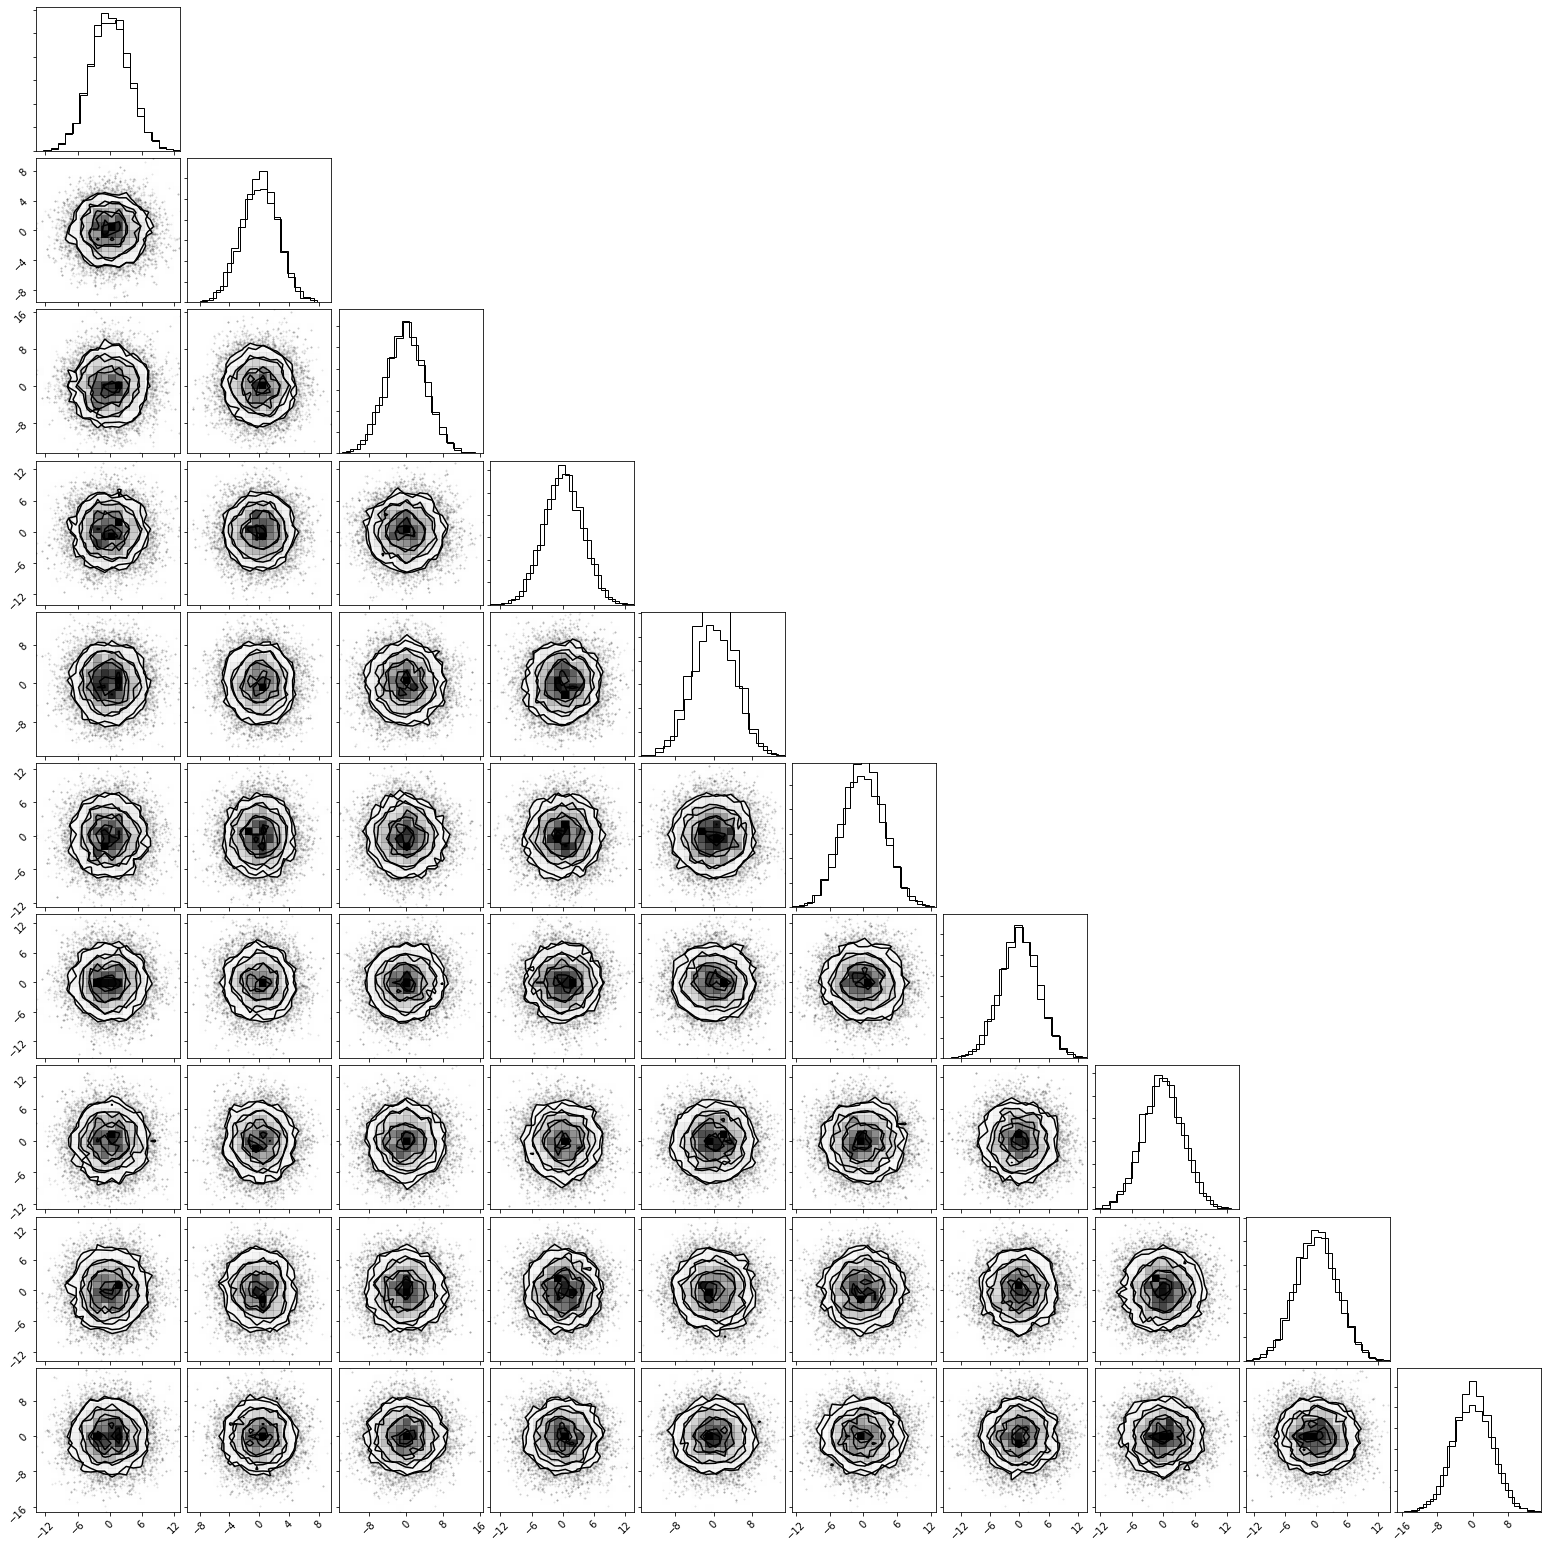

In [14]:
import corner
figure = corner.corner(jam_samples.chain[-10000:,:])
corner.corner(emcee_samples[-10000:,:], fig=figure);